In [236]:
import pandas as pd
from pandas_datareader import data as web
import plotly.graph_objects as go
import plotly.subplots as subp
from datetime import datetime, timedelta
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np

In [237]:
#pull a json file from Alpha Vantage, store it into an excel file locally

ALPHA_VANTAGE_API_KEY = 'K8PO7UJB8247TE1N' 
 
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas') 

ticker = input("Enter ticker symbol of the stock you'd like to view: ")
ticker = ticker.upper(); 

intraday_data, data_info = ts.get_intraday( 
    ticker, outputsize='full', interval='1min') 

intraday_data.to_excel('stockData.xlsx')

Enter ticker symbol of the stock you'd like to view: tsla


In [238]:
cbh = pd.offsets.CustomBusinessHour(start='04:00', 
                                    end='21:00', 
                                    weekmask='Mon Tue Wed Thu Fri')

In [239]:
#read the stock excel file into a pandas data frame 
df = pd.read_excel('stockData.xlsx', index_col=0)

bhours = pd.date_range(start=datetime.today() - timedelta(days=14), end=datetime.today(), freq=cbh)

bhoursSeries = bhours.to_series()
bhoursSeries = bhoursSeries.resample('T').pad()

df = df.reindex(bhoursSeries.index, fill_value=np.nan)

df.columns = ['open', 'low', 'high', 'close', 'volume']

In [240]:
#resize to other minute or hour charts
#df = df.reindex(df.index.to_series().resample('15T').pad()) #15 minute data

                        close
2020-10-05 04:00:00  0.000000
2020-10-05 04:01:00  0.000000
2020-10-05 04:02:00 -0.005616
2020-10-05 04:03:00  0.003251
2020-10-05 04:04:00  0.002862
...                       ...
2020-10-16 19:56:00 -0.000046
2020-10-16 19:57:00  0.000183
2020-10-16 19:58:00 -0.000205
2020-10-16 19:59:00  0.000160
2020-10-16 20:00:00  0.000228

[16801 rows x 1 columns]
                        close
2020-10-05 04:00:00       NaN
2020-10-05 04:01:00       NaN
2020-10-05 04:02:00 -0.005632
2020-10-05 04:03:00  0.003246
2020-10-05 04:04:00  0.002858
...                       ...
2020-10-16 19:56:00 -0.000046
2020-10-16 19:57:00  0.000183
2020-10-16 19:58:00 -0.000205
2020-10-16 19:59:00  0.000160
2020-10-16 20:00:00  0.000228

[16801 rows x 1 columns]


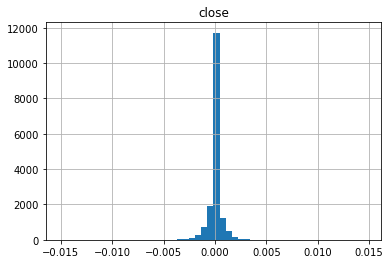

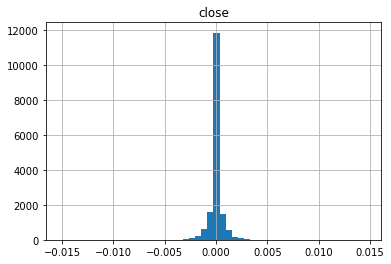

              close
count  16801.000000
mean       0.000002
std        0.000694
min       -0.014967
25%        0.000000
50%        0.000000
75%        0.000000
max        0.014671


In [241]:
#calculate percent change and log percent change between every minute tab
adjClose = df[['close']]
minPctChange = adjClose.pct_change()
minPctChange.fillna(0, inplace=True)
print(minPctChange)
logPctChange = np.log(adjClose.pct_change() + 1)
print(logPctChange)

#plot the histograms of the minute and log minute percent change
minPctChange.hist(bins=50)
logPctChange.hist(bins=50)
plt.show()
print(minPctChange.describe())

In [242]:
#find the corresponding colors for the volume bar graph
df['color'] = ''

df['color'][0:] = (np.where(df['close'][0:] 
                              > df['open'][0:], 'green', df['color']))
df['color'][0:] = (np.where(df['close'][0:] 
                              == df['open'][0:], 'gray', df['color']))
df['color'][0:] = (np.where(df['close'][0:] 
                              < df['open'][0:], 'red', df['color']))
df['color'][0:] = (np.where(df['color'][0:] 
                              == '', 'black', df['color']))
df

<ipython-input-242-fdcda8e877c9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Mike/Desktop/UCSB/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-242-fdcda8e877c9>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Mike/Desktop/UCSB/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying t

,open,low,high,close,volume,color
2020-10-05 04:00:00,NaN,NaN,NaN,NaN,NaN,black
2020-10-05 04:01:00,424.23,424.65,423.50,423.80,12214.0,red
2020-10-05 04:02:00,423.52,423.52,421.42,421.42,7390.0,red
2020-10-05 04:03:00,422.00,422.79,421.51,422.79,5334.0,green
2020-10-05 04:04:00,422.73,424.00,422.73,424.00,4540.0,green
...,...,...,...,...,...,...
2020-10-16 19:56:00,438.25,438.25,438.02,438.04,3193.0,red
2020-10-16 19:57:00,438.06,438.12,438.00,438.12,3182.0,green
2020-10-16 19:58:00,438.19,438.19,438.03,438.03,3092.0,red
2020-10-16 19:59:00,438.10,438.10,438.05,438.10,3240.0,gray


In [243]:
trace1 = {
    'x': df.index,
    'open': df.open,
    'close': df.close,
    'high': df.high,
    'low': df.low,
    'type': 'candlestick',
    'name': ticker,
    'showlegend': True,
    'visible': True
}

trace5 = {
    'x': df.index,
    'y': df.close,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'black'
            },
    'name': ticker,
    'showlegend': True,
    'connectgaps':True,
    'visible': False
}

#quickTest = df.index
#for s in quickTest:
#    if (int(s[11:13]) > 19 or int(s[11:13]) < 7):
#        df.drop(s)

In [244]:
# Calculate and define moving average of 20 periods
df['sma_20'] = df.close.rolling(window=20, min_periods=1).mean()

# Calculate and define moving average of 50 periods
df['sma_50'] = df.close.rolling(window=50, min_periods=1).mean()

# 250 periods moving average
df['sma_250'] = df.close.rolling(window=250, min_periods=1).mean()

In [245]:
#calculate bollinger bands
bol_size = 2
mov_avg_size = 20

df['low_boll'] = df['sma_20'] + df['close'].rolling(window = mov_avg_size, min_periods=1).std() * bol_size
df['high_boll'] = df['sma_20'] - df['close'].rolling(window = mov_avg_size, min_periods=1).std() * bol_size

In [246]:
#calculate RSI

def computeRSI (data, window):
    diff = data.diff(1).dropna()    
    diff

    up = 0 * diff
    down = 0 * diff
    up[diff>0] = diff[ diff>0 ]
    down[diff<0] = diff[diff<0]

    #choose to use ewm, could use sma instead
    avgUp   = up.ewm(com=window-1 , min_periods=window).mean()
    avgDown = down.ewm(com=window-1 , min_periods=window).mean()
    
    rs = abs(avgUp/avgDown)
    rsi = 100 - 100/(1+rs)
    return rsi

In [247]:
#add RSI to dataframe and create a trace
rsiTimePeriod = 14
df['RSI'] = computeRSI(df['close'], rsiTimePeriod)
df

trace11 = {
    'x': df.index,
    'y': df['RSI'],
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'lightblue'
    },
    'name': 'RSI ' + str(rsiTimePeriod),
    'connectgaps':True,
    'visible': True
}

In [248]:
trace2 = {
    'x': df.index,
    'y': df['sma_20'],
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'SMA 20',
    'connectgaps':True,
    'visible': True
}

trace3 = {
    'x': df.index,
    'y': df['sma_50'],
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'gold'
    },
    'name': 'SMA 50',
    'connectgaps':True,
    'visible': True
}

In [249]:
trace4 = {
    'x': df.index,
    'y': df['sma_250'],
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'purple'
    },
    'name': 'SMA 250',
    'connectgaps':True,
    'visible': True
}

In [250]:
#new indicator: Bollinger Bands
trace6 = {
    'x': df.index,
    'y': df['low_boll'],
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'black'
    },
    'name': 'Low Boll Band',
    'connectgaps':True,
    'visible': False
}

trace7 = {
    'x': df.index,
    'y': df['high_boll'],
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'black'
    },
    'name': 'High Boll Band',
    'connectgaps':True,
    'visible': False
}

In [251]:
# plots the volume bar graph over the stock chart

trace8 = {
    'x': df.index,
    'y': df['volume'],
    'type': 'bar',
    'marker': {'color': df['color']},
    'orientation':"v",
    'name': 'Volume',
    'showlegend':True,
    'opacity':1,
    'visible':True
}

In [252]:
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': ticker + ' Stock Graph',
        'font': {
            'size': 15
        }
    },
    'plot_bgcolor':'rgba(255, 255, 255, 0)'
})

In [259]:
#Moving Averages Strategy
df['signal'] = 0.0
#signals
df['signal'][50:] = (np.where(df['sma_50'][50:] 
                              >= df['sma_250'][50:], 1.0, 0.0))
#trading orders
df['positions'] = df['signal'].diff() #1 buys, -1 sells

<ipython-input-259-40f19dcfdc1b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Mike/Desktop/UCSB/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [260]:
#Moving Averages + RSI Strategy
'''
df['signal'] = 0.0
#signals
df['signal'][50:] = (np.where((df['sma_50'][50:] 
                              >= df['sma_250'][50:]), 1.0, 0.0))

df['signal'][50:] = (np.where((df['RSI'][50:] < 50) & (df['signal'][50:] == 1.0), 2.0, 0.0))
df['signal'][50:] = (np.where((df['sma_50'][50:] 
                              < df['sma_250'][50:]) & (df['signal'][50:] == 2.0), 1.0, df['signal'][50:]))

df['positions'] = df['signal'].diff() #2 buys, -2 sells


df['positions']'''

"\ndf['signal'] = 0.0\n#signals\ndf['signal'][50:] = (np.where((df['sma_50'][50:] \n                              >= df['sma_250'][50:]), 1.0, 0.0))\n\ndf['signal'][50:] = (np.where((df['RSI'][50:] < 50) & (df['signal'][50:] == 1.0), 2.0, 0.0))\ndf['signal'][50:] = (np.where((df['sma_50'][50:] \n                              < df['sma_250'][50:]) & (df['signal'][50:] == 2.0), 1.0, df['signal'][50:]))\n\ndf['positions'] = df['signal'].diff() #2 buys, -2 sells\n\n\ndf['positions']"

In [262]:
trace9 = { 
    'name': 'BUY',
    'mode':"markers",
    'x':df.loc[df.positions == 1.0].index,
    'y':df.sma_50[df.positions == 1.0],
    'marker_symbol': 'triangle-up',
    'marker_line_color': "black",
    'marker_color': "green", 
    'marker_line_width': 2,
    'marker_size': 15,
    'visible': False
}

trace10 = { 
    'name': 'SELL',
    'mode':"markers",
    'x':df.loc[df.positions == -1.0].index,
    'y':df.sma_50[df.positions == -1.0],
    'marker_symbol': 'triangle-down',
    'marker_line_color': "black",
    'marker_color': "red", 
    'marker_line_width': 2,
    'marker_size': 15,
    'visible': False
}

In [263]:
fig = go.Figure(data=data, layout=layout)

fig = subp.make_subplots(rows = 5, cols = 1, specs=[[{"secondary_y": True, "rowspan":3}],
                                                    [None],
                                                    [None],
                                                    [None],
                                                    [{"secondary_y": False, "rowspan":1}]])
         
#add all traces
fig.add_trace(trace1, row = 1, col = 1)
fig.add_trace(trace2, row = 1, col = 1)
fig.add_trace(trace3, row = 1, col = 1)
fig.add_trace(trace4, row = 1, col = 1)
fig.add_trace(trace5, row = 1, col = 1)
fig.add_trace(trace6, row = 1, col = 1)
fig.add_trace(trace7, row = 1, col = 1)


#adding volume over the graphs
fig.add_trace(trace8, row = 1, col = 1, secondary_y=True)

#add buy and sell signals to the graph
fig.add_trace(trace9, row = 1, col = 1)
fig.add_trace(trace10, row = 1, col = 1)
fig.add_trace(trace11, row = 5, col = 1)

fig['layout'].update(layout)

fig.update_yaxes(range=[0,df['volume'].max()*4], secondary_y=True)

#indicator and chart buttons
fig.update_layout(
    #xaxis={'rangeslider':{'visible':False}},
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=1,
            x=0.7,
            y=1.2,
            #for visible: {candle, sma_20, sma_50, sma_250, line, low_boll, high_boll, volume, buy, sell, rsi}
            buttons=list([
                dict(label="Chart",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False, False, True, False, False, True]},
                           {"title": ticker + " Line Chart",
                            "annotations": []}]),
                dict(label="Candlesticks",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False, True, False, False, True]},
                           {"title": ticker + " Candlestick Chart",
                            "annotations": []}]),
                dict(label="Moving Averages",
                     method="update",
                     args=[{"visible": [False, True, True, True, True, False, False, True, False, False, True]},
                           {"title": ticker + " Moving Averages",
                            "annotations": []}]),
                dict(label="Bollinger Bands",
                     method="update",
                     args=[{"visible": [True, True, False, False, False, True, True, True, False, False, True]},
                           {"title": ticker + " Boll Bands",
                            "annotations": []}]),
                dict(label="MA Strategy",
                     method="update",
                     args=[{"visible": [False, True, True, True, True, False, False, True, True, True, True]},
                           {"title": ticker + " Strategy 1",
                            "annotations": []}])
            ])
        )
    ]
)

#fig.update_yaxes(title_text="<b>Price per share</b>", secondary_y=False, row = 1, col = 1)
fig.update_yaxes(title_text="RSI", row = 5, col = 1)
#fig.update_yaxes(title_text="<b>Volume</b>", secondary_y=True)

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(0, 0, 0, 0.25)', row = 1, col = 1)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgba(0, 0, 0, 0.25)', row = 1, col = 1)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(0, 0, 0, 0.25)', row = 5, col = 1)

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), #hide weekends
        dict(bounds=[20, 4], pattern="hour") #hide hours outside of stock market's main hours
    ]
)

fig.write_html("stockChart.html")